# Chapter 3: Undirected graphs

*Selected Topics in Mathematical Optimization*

*2016-2017*

**Bernard De Baets**

**Michiel Stock**

**Raúl Pérez-Fernández**

In [172]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.spatial import voronoi_plot_2d, Voronoi
import numpy as np
%matplotlib inline

## Some essential data structures in python

Using the correct datastructure is key to implementing an efficient graph algorithm. Below is a concise overview of some elementary python data structures.

For more information on the time complexity of operations on these data structures, see [this](https://wiki.python.org/moin/TimeComplexity) link.

### Lists: ordered  collection of objects

Lists store objects in sequential order. Adding and removing elements at the back is easy, inserting or removing elements elsewhere is computationally inefficient (memory has to be reshuffled).

In [173]:
#List: elements don't have to be same type.
my_list = [1, 2, 3, 4, 5]

In [174]:
#Put in at beginning not efficient, because python needs to reacllocta all indices
my_list.append(6)  # add element at the back
my_list
#CHecking whether element in list is inefficient.( Other datastructures that are more efficient to do this?)
#Is dependent on list length!

[1, 2, 3, 4, 5, 6]

In [175]:
my_list.pop()  # return last element

6

In [176]:
my_list  # element is gone

[1, 2, 3, 4, 5]

In [177]:
my_list[4]  # take element

5

In [178]:
my_list[3] = 'three'  # replace
my_list

[1, 2, 3, 'three', 5]

In [179]:
# for loops in lists
squares = [x**2 for x in range(1, 11)]
squares

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [180]:
# a more complex example
squares_odd = [x**2 for x in range(1, 11) if x%2==1]
squares_odd

[1, 9, 25, 49, 81]

### Sets: unordened collection of objects

Sets have no ordening and cannot contain duplicates. It is very efficient (constant time compelxity) to check if an element is present and to add or remove an object.

In [181]:
#More efficient to check whether element in set. Is independent on set length!
numbers = set([1, 2, 15, -1, 4, 2, 3, 4])  # make set from list 
numbers  # no particular order or duplicates

{-1, 1, 2, 3, 4, 15}

In [182]:
5 in numbers  # check if element is member

False

In [183]:
numbers.add(5)  # add element

In [184]:
5 in numbers

True

In [185]:
# set operations on two sets
new_numbers = set([2, 15, -1, 8, 6, 15])
new_numbers

{-1, 2, 6, 8, 15}

In [186]:
numbers & new_numbers  # intersection (AND)

{-1, 2, 15}

In [187]:
numbers | new_numbers  # union (OR)

{-1, 1, 2, 3, 4, 5, 6, 8, 15}

In [188]:
numbers - new_numbers  # set difference (in first but not in second)

{1, 3, 4, 5}

## Dictorinary: key-value storage

Dictionaries are the best of both lists and sets, they store values by a key

In [189]:
my_dict = {'A' : 1, 'B' : 'bee', 'C' : [1, 2, 3]}  # make dictionary

In [190]:
my_dict['B']  # get value associated by key

'bee'

In [191]:
my_dict['D'] = 'new value'  # add new key-value
my_dict

{'A': 1, 'B': 'bee', 'C': [1, 2, 3], 'D': 'new value'}

In [192]:
'A' in my_dict  # check if dict has key

True

In [193]:
for k, v in my_dict.items():  # iterate over values
    print(k, v)


D new value
A 1
B bee
C [1, 2, 3]


In [194]:
for k in my_dict.keys():  # iterate over keys
    print(k)

D
A
B
C


In [195]:
for v in my_dict.values():  # iterate over values
    print(v)

new value
1
bee
[1, 2, 3]


## Representing graphs in python

Consider the following example graph:

Typically, graphs are represented as:
- **list of edges**: a set of edges (tuples of vertices) we use sets are there is no order in the edges. THis is the prefered format to *store* graphs.
- **adjacency lists**: in python implemented as dictionaries. Each vertex is a key and the associated value is a set of neighboring edges (for undirected graphs every outgoing edge should be balanced by an ingoing edge).
- **adjacenty matrices**: matrix of which the elements store the edges. Is only used for dense graphs.

Example of the theory:

![](Figures/undir_graph.png)

In [196]:
#Called list of edges, but is a set
edges = set([('A', 'B'), ('B', 'C'), ('C', 'D'), ('A', 'D'), ('C', 'E'), ('D', 'E')])

In [197]:
from graphs import edges_to_adj_list

In [198]:
adj_list = edges_to_adj_list(edges)
adj_list

{'A': {'B', 'D'},
 'B': {'A', 'C'},
 'C': {'B', 'D', 'E'},
 'D': {'A', 'C', 'E'},
 'E': {'C', 'D'}}

Some basic graph algorithms are implemented:
- `give_connected_component`: gives all connected components for a vertex
- `is_connected`: checks if a graph is connected (every edge can be reached from every other edge)
- `has_path`: checks if there exists a path between two vertices
- `is_bridge`: checks if an edge is a bridge (i.e. removing it makes the graph disconnected

Run the examples and check the result

In [199]:
from graphs import give_connected_component, is_connected, is_bridge, has_path

In [200]:
example1_edges = set([('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'C'), ('D', 'E'),
                     ('E', 'F'), ('F', 'G'), ('G', 'E'), ('D', 'F')
                     ])
example2_edges = set([('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'),
                     ('D', 'G'), ('F', 'G'), ('G', 'E'), ('D', 'F')
                     ])

In [201]:
example1_adj_list = edges_to_adj_list(example1_edges)
example2_adj_list = edges_to_adj_list(example2_edges)

In [202]:
#Write out example to view structure
example2_adj_list

{'A': {'B', 'C'},
 'B': {'A', 'C'},
 'C': {'A', 'B'},
 'D': {'E', 'F', 'G'},
 'E': {'D', 'G'},
 'F': {'D', 'G'},
 'G': {'D', 'E', 'F'}}

In [203]:
give_connected_component(example1_adj_list, 'A')

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

In [204]:
give_connected_component(example2_adj_list, 'A')

{'A', 'B', 'C'}

In [205]:
is_connected(example1_adj_list)

True

In [206]:
is_connected(adj_list)

True

In [207]:
is_connected(example2_adj_list)

False

In [208]:
is_bridge(example1_adj_list, ('A', 'B'))

False

In [209]:
is_bridge(example1_adj_list, ('C', 'D'))

True

In [210]:
example1_adj_list

{'A': {'B', 'C'},
 'B': {'A', 'C'},
 'C': {'A', 'B', 'D'},
 'D': {'C', 'E', 'F'},
 'E': {'D', 'F', 'G'},
 'F': {'D', 'E', 'G'},
 'G': {'E', 'F'}}

In [211]:
has_path(example2_adj_list, 'A', 'C')

True

In [212]:
has_path(example2_adj_list, 'A', 'F')

False

## Fleury's algorithm

Fleury's algorithm is a simple (though inefficient) algorithm to find an Eulerian trail (i.e. a walk on the graph that passes all the edges).

It can be shown that a graph has an Eulerian trail if and only if it is connected and it it has exactly zero or two vertices with an odd degree.

Fleury's algorithm is executed as follows:
1. Start at a vertex of odd degree, or, if the graph has none, start with an arbitrarily chosen vertex.
2. Chooses the next edge in the path to be one whose deletion would not disconnect the graph (i.e. is not a bridge), unless there is no such edge, in which case pick the remaining edge left at the current vertex.
3. Add the edge to the path and remove the edge from the graph.
4. Repeat steps 2-3 until no more edges are left.

**ASSIGNMENT 1**

1. Complete the code of fleury's algorithm. The algorithm first checks if an Eulerian path exists (and returns None if not) and returns the path as a list. Use the given function `is_bridge` to check if an
2. Study the time complexity of the algorithm. For this you have 25 graphs at your disposal. These graphs are stored in json format in the form `eulerianxxx.json` with '`xxx`' the number of edges. The function `load_graph` can read this data file (see example). For each file, measure the time to find the Eulerian path and make a graph (in log-log scale) of the time vs. the number of edges. Comment on the relation (linear time complexity, super/sublinear?) Does this make sense? HINT: detecting if an edge is a bridge is done with an average time complexity linear in the number of edges.

In [213]:
def fleury_algorithm(adj_list):
    """
    Fleury's algorithm for finding an Eulerian path (if one exists)
    
    First it checks if the path exists, if it exists, it returns a list of
    the nodes that are visisted in an Eulerian path
    
    Inputs:
        - adj_list
        
    Outputs:
        - path
    """
    adj_list = {k : v.copy() for k, v in adj_list.items()}  # make a copy
    # check if Eulerian path exists
    if not is_connected(adj_list):#if not connected, Eulerian path doesn't exist.
        return None
    else:#If connected, check number of odd degrees
        no_odd_degrees=0
        no_edges=0#Already store number of edges, will be used for construction of Eulerian trail.
        #Already determine vertices with odd degree, to easily start from them when constructing Eulerian trail:
        odd_degree_vertices=[]
        for vertex,edges in adj_list.items():
            no_edges+=len(edges)#Count edges
            if len(edges)%2!=0:#Check if vertex has odd degree
                odd_degree_vertices.append(vertex)
                no_odd_degrees+=1
        no_edges/=2#Edges are counted twice, thus divide by 2 for correct number of edges
        if no_odd_degrees!=0 and no_odd_degrees!=2:
            return None
    #If Eulerian trail exists, calculate it:
    if no_odd_degrees==0:#If number of odd degrees is 0, start a a random place.
        vertex1=np.random.choice(adj_list.keys())
        path=[vertex1]#Add first vertex to path.
        vertex2=np.random.choice(tuple(adj_list[vertex1]))#Choose edge at current vertex randomly.
        while no_edges!=0:#Execute until no edges left.
            #Execute untill edge found at current vertex that doesn't disconnect remaining graph, unless no 
            #such edge exists:
            while True:
                #If only 1 edge at current vertex, don't need to check whether bridge or not:
                if len(adj_list[vertex1])==1:
                    path.append(adj_list[vertex1].pop())#Remove edge, add to path.
                    adj_list[vertex2].remove(vertex1)#Remove edge
                    #Remove disconnected vertex from graph, not needed in principle:
                    #del adj_list[vertex1]
                    vertex1=vertex2#Continue walk
                    break
                #If multiple edges at current vertex, check whether chosen edge bridge or not:
                elif not is_bridge(adj_list, (vertex1,vertex2)):
                    path.append(vertex2)#If not bridge, add to path.
                    adj_list[vertex1].remove(vertex2)#Remove edge
                    adj_list[vertex2].remove(vertex1)#Remove edge
                    vertex1=vertex2#Continue walk
                    break
                if no_edges!=1:#To prevent error when last edge removed.
                    vertex2=np.random.choice(tuple(adj_list[vertex1]))#Choose new edge to test.
            if no_edges!=1:#To prevent error when last edge removed
                vertex2=np.random.choice(tuple(adj_list[vertex1]))
            no_edges-=1#Count down till all edges removed.       
    else:#If number of odd degrees is 2, have to start at odd degree vertex.
        vertex1=np.random.choice(odd_degree_vertices)
        path=[vertex1]
        vertex2=np.random.choice(tuple(adj_list[vertex1]))
        while no_edges!=0:
            while True:
                if len(adj_list[vertex1])==1:
                    path.append(adj_list[vertex1].pop())
                    adj_list[vertex2].remove(vertex1)
                    #Remove disconnected vertex from graph, not needed in principle:
#                     del adj_list[vertex1]
                    vertex1=vertex2
                    break
                elif not is_bridge(adj_list, (vertex1,vertex2)):
                    path.append(vertex2)
                    adj_list[vertex1].remove(vertex2)
                    adj_list[vertex2].remove(vertex1)
                    vertex1=vertex2
                    break
                if no_edges!=1:
                    vertex2=np.random.choice(tuple(adj_list[vertex1]))
            if no_edges!=1:
                vertex2=np.random.choice(tuple(adj_list[vertex1]))
            no_edges-=1  
    return path       

In [214]:
#Print out graph to allow visual control
adj_list

{'A': {'B', 'D'},
 'B': {'A', 'C'},
 'C': {'B', 'D', 'E'},
 'D': {'A', 'C', 'E'},
 'E': {'C', 'D'}}

In [215]:
fleury_algorithm(adj_list)

['C', 'B', 'A', 'D', 'E', 'C', 'D']

In [216]:
from graphs import load_graph

In [217]:
# example on how to load the graph
adj_loaded = load_graph('Data_Eulerian/eulerian14.json')
print(adj_loaded)
fleury_algorithm(adj_loaded)

{'3': {'4', '7', '6', '2'}, '0': {'8', '2'}, '7': {'3', '5'}, '6': {'3', '8', '5', '2'}, '4': {'3', '8'}, '8': {'4', '0', '5', '6', '2'}, '5': {'8', '7', '6', '2'}, '2': {'3', '8', '0', '5', '6'}}


['8', '5', '7', '3', '2', '0', '8', '6', '2', '8', '4', '3', '6', '5', '2']

In [218]:
# use this cell to measure the time to find the Eulerian path for each graph
edge_numbers=[14, 26, 46, 74, 110, 154, 206, 266, 334, 410, 494, 586, 686, 794, 910, 1034, 1166, 1306, 1454,\
1610, 1774, 1946, 2126, 2314, 2510]
# edge_numbers=[14, 26, 46, 74]
# edge_numbers=[14, 26]
duration=np.zeros((1,len(edge_numbers)))
file_string_start='Data_Eulerian/eulerian'
file_string_end='.json'
for i,edge_number in enumerate(edge_numbers):
    adj_loaded = load_graph(file_string_start+str(edge_number)+file_string_end)
    duration_help=%timeit -q -o fleury_algorithm(adj_loaded)
    duration[(0,i)]=duration_help.best

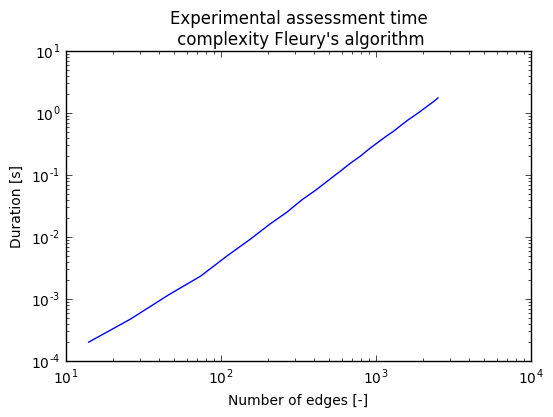

In [219]:
# use this cell to plot the time as a function of the number of edges (log-log scale)
fig, ax = plt.subplots()
ax.plot(edge_numbers,duration.reshape((-1,1)))
ax.loglog()
# ax.semilogy()
# ax.semilogx()
ax.set_title('Experimental assessment time\n complexity Fleury\'s algorithm')
ax.set_xlabel('Number of edges [-]')
ax.set_ylabel('Duration [s]')

DISCUSS THE EMPIRICAL TIME COMPLEXITY HERE<br>

The time complexity of an algorithm is commonly expressed using big O notation, which excludes coefficients and lower order terms. E.g., if the time required by an algorithm on all inputs of size $n$ is at most $5n^3 + 3n$ for any $n$, the asymptotic time complexity is $O(n^3)$. In addition, an algorithm with $t(n) = O(n)$ is called a linear time algorithm. (Wikipedia, https://en.wikipedia.org/wiki/Time_complexity) Hence, time complexity can be assessed by computing the slope of the data in the figure above. A linear time algorithm would result in a slope $\approx 1$.

In [220]:
(np.log10(duration.reshape((-1,1))[-1][0])-np.log10(duration.reshape((-1,1))[0][0]))\
/(np.log10(edge_numbers[-1])-np.log10(edge_numbers[0]))

1.7476002519461835

Since the slope is bigger than 1, this is a superlinear time algorithm.<br>
This actually makes sence. The hint given is: "detecting if an edge is a bridge is done with an average time complexity linear in the number of edges." Since checking whether an edge is a bridge has to be done for more than 1 edge, there is indeed some sort of product related to $n$ determining the number of calculations  needed (which is proportional to the time needed to find a solution). However, since edges are removed from the graph every iteration, it is not so that $n\cdot n$ calculations are needed. For simplicity, suppose that every iteration it has to be checked whether an edge is a brigde (this will not happen so often in reality), then the number of calculations is proportional to $n+n-1+n-2+n-3\dots +n-n+1$, wich is equal to $n^2-(2+3+\dots +n)$. If for this expression, the time to find a solution is plotted vs. $n$, this will result in a slope of more than 1 but less than 2. This corresponds to the calculation of the slope above.<br>
One remark has to be made. Since I included a lot of random choices in my implementation of Fleury's algorithm, this will have an effect on the calculation time, because sometimes the same edge will be chosen multiple times and the bridgedness will also be checked multiple times. However, I still expect the slope to be bigger than 1 if this randomness would be removed and every iteration, an iteration over the edges belonging to the vertex from where the path has to be continued would be made.

## Graph coloring using six colors

Graph coloring is an optimization problem of assinging a color to each label using as few colors as possible such that no neighboring vertices have the same color.

The four color theorem states that a planar graph can be colored using only four colors.

We will use six colors (though we rarely need more than five) to color a planar graph. For this, the algorithm is very simple:

1. Color recursively with the six colors all vertices of degree five or more.
2. Color the rest of the graph with a free color.

**ASSIGNMENT 2**

1. Complete the graph coloring algorithm.
2. What do you think the time complexity of this algorithm is going to be (based on reasoning).

You can illustrate this algorithm on a Voronoi plot (a tesselation of a plane based on the distance to a set of points). Feel free to improve the graphics :-)

In [221]:
def graph_color(adj_list, colors=['k', 'r', 'b', 'g', 'y', 'm']):
    """
    Provides one of six colors for each vertex in a planar graph
    such that no neighboring vertices have the same color
    
    Inputs:
        - adj_list: adjecency list of a planar graph
        - colors: list of six colors (default those for matplotlib plotting)
        
    Output:
        - vertices_colors: a dict with a color for each vertex
    """
    vertices_colors ={}
    low_degree_vertices=set({})#Already store vertices with lower degree than 5
    for vertex in adj_list.keys():#Iterate over vertices
        if len(adj_list[vertex])<5:
            low_degree_vertices.add(vertex)
        else:#If degree >=5, already assign color
            i=0
            searching=True
            while searching:#Search until suitable color found.
                color=colors[i]#Iterate over colors.
                if len(vertices_colors)==0:#If nothing colored yet, any color is suitable.
                    vertices_colors[vertex]=color
                    break
                #If arrived at last color, algorithm guarantees that this color is not yet used.
                elif i==len(colors)-1:
                    vertices_colors[vertex]=color
                    break
                #Else, check if chosen color already used by neighbour
                for j,neighbour in enumerate(adj_list[vertex]):
                    #If color used
                    if neighbour in vertices_colors and color==vertices_colors[neighbour]:
                        i+=1#Choose another color
                        break#Restart control
                    #If all neighbours checked and ok
                    elif j==len(adj_list[vertex])-1:
                        vertices_colors[vertex]=color#Assign this color to vertex
                        searching=False#Stop searching
    #Assign colors to vertices with degree order <5
    for vertex in low_degree_vertices:
        i=0
        searching=True
        while searching:
            for j,neighbour in enumerate(adj_list[vertex]):
                if neighbour in vertices_colors and colors[i]==vertices_colors[neighbour]:
                    i+=1
                    break
                elif j==len(adj_list[vertex])-1:
                    vertices_colors[vertex]=colors[i]
                    searching=False
    return vertices_colors

In [222]:
from graphs import get_planar_graph

In [223]:
X = np.random.randn(20, 2)  # random points for Voronoi tesselation
planar_graph = get_planar_graph(X)

In [224]:
planar_graph

{0: {3, 8, 11, 12, 15},
 1: {2, 8, 10},
 2: {1, 5, 6, 8, 10, 11},
 3: {0, 8, 9, 12, 19},
 4: {7, 8, 14, 16, 18, 19},
 5: {2, 6, 10, 13},
 6: {2, 5, 11, 13},
 7: {4, 16, 17, 19},
 8: {0, 1, 2, 3, 4, 9, 10, 11, 14, 18},
 9: {3, 8, 14, 19},
 10: {1, 2, 5, 8, 18},
 11: {0, 2, 6, 8, 12, 13, 15},
 12: {0, 3, 11, 13, 15, 17, 19},
 13: {5, 6, 11, 12, 17},
 14: {4, 8, 9, 19},
 15: {0, 11, 12},
 16: {4, 7, 18},
 17: {7, 12, 13, 19},
 18: {4, 8, 10, 16},
 19: {3, 4, 7, 9, 12, 14, 17}}

In [225]:
coloring = graph_color(planar_graph, colors=['k', 'r', 'b', 'g', 'y', 'm'])
coloring

{0: 'k',
 1: 'g',
 2: 'k',
 3: 'r',
 4: 'k',
 5: 'b',
 6: 'g',
 7: 'r',
 8: 'b',
 9: 'k',
 10: 'r',
 11: 'r',
 12: 'b',
 13: 'k',
 14: 'r',
 15: 'g',
 16: 'b',
 17: 'y',
 18: 'g',
 19: 'g'}

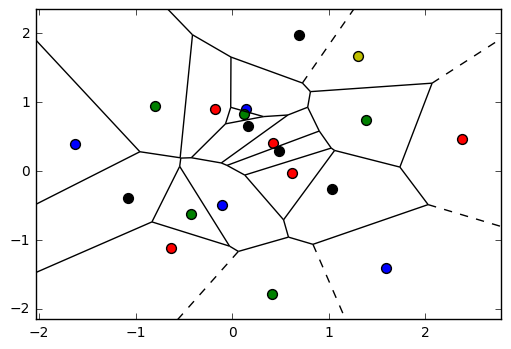

In [226]:
fig, ax = plt.subplots()

vor = Voronoi(X)

voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False)
for i, c in coloring.items():
    ax.scatter(X[i, 0], X[i, 1], c=c, s=50)

Output: tesselation will be colored only by dot on each part.

# Answer to the question regarding the time complexity of the algorithm
I choose the number of vertices as the size of the problem, $n$. Let's take large values of $n$, say 100 or 1000, or more. The number of calculations will be at least proportional to $n$. Let's take the worst case scenario for the number of calculations. I assume that 8 edges per vertex is a reasonable maximum number. Furthermore, for every edge of a vertex at most 6 colors have to be checked. Hence, for a worst case scenario, $n\cdot8\cdot6$ calculations are needed. Since $n$ was chosen large, this number is nowhere near $n^2$. Therefore I think that this algorithm has linear time complexity.

# Additional error controling part

In [227]:
def control_graph(adj_list):
    colouring2=graph_color(adj_list, colors=['k', 'r', 'b', 'g', 'y', 'm'])
    errors=0
    for vertex in colouring2:
        for neighbour in adj_list[vertex]:
            if colouring2[vertex]==colouring2[neighbour]:
                errors+=1
    return errors

In [228]:
errors_iteration=[]
for i in range(10000):
    X = np.random.randn(20, 2)  # random points for Voronoi tesselation
    planar_graph = get_planar_graph(X)
    errors_iteration.append(control_graph(planar_graph))
np.sum(errors_iteration)

0